In [27]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov  2 21:14:54 2018

@author: wmy
"""

'\nCreated on Fri Nov  2 21:14:54 2018\n\n@author: wmy\n'

### 下面导入科学计算库numpy和数据可视化库matplotlib.pyplot ###

In [28]:
# 导入库numpy和matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 使用imread读取图片，并用np.tolist转换成列表

In [29]:
myimg = plt.imread('timg_16.jpg')
myimg_list = myimg.tolist()

In [30]:
# 用于显示图片的函数
def show_image(nparray):
    '''
    Args:
        nparray: numpy 数组
    '''
    plt.imshow(nparray)
    plt.show()
    pass

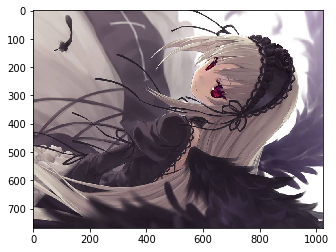

width:1024pix
height:768pix


In [31]:
# 显示图片
show_image(np.array(myimg_list))
print('width:'+str(len(myimg_list[0]))+'pix')
print('height:'+str(len(myimg_list))+'pix')

### 使用列表的切片对图像进行裁剪

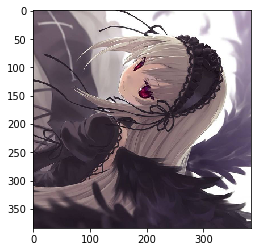

In [32]:
# 裁剪图片
cut_image = []

for h in myimg_list[0:768:2]:
    cut_image.append([])
    for pix in h[1024-768:1024:2]:
        cut_image[len(cut_image)-1].append(pix)
        pass
    pass

show_image(np.array(cut_image))

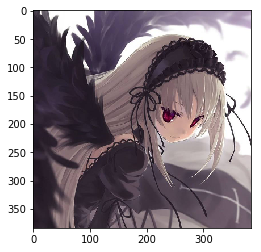

In [33]:
# 裁剪头像
avatar = []

for h in myimg_list[0:768:2]:
    avatar.append([])
    for pix in h[1024-768:1024:2]:
        avatar[len(avatar)-1].append(pix)
        pass
    pass

# 作镜像
avatar_size = len(avatar)

for h in range(avatar_size):
    for w in range(avatar_size-h):
        temp = avatar[h][w]
        avatar[h][w] = avatar[avatar_size-1-w][avatar_size-1-h]
        avatar[avatar_size-1-w][avatar_size-1-h] = temp
        pass
    pass

show_image(np.array(avatar))

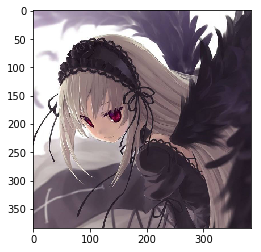

In [34]:
# 翻转
for h in range(avatar_size):
    for w in range(int(avatar_size/2)):
        temp = avatar[h][w]
        avatar[h][w] = avatar[h][avatar_size-1-w]
        avatar[h][avatar_size-1-w] = temp
        pass
    pass

show_image(np.array(avatar))

### MaxPool:最大池化
- 在图像识别中，最大池化常常用于缩小图片来减小卷积网络的负担
- 但其对特征的提取并无太大影响
![](maxpool.png)

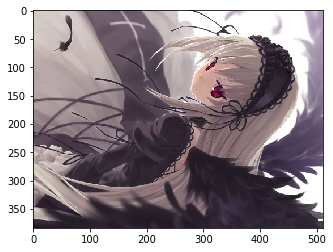

In [35]:
# maxpool strides(2, 2)
width = len(myimg_list[0])
height = len(myimg_list)

ws = np.arange(0, width, 2)
hs = np.arange(0, height, 2)

maxpool_image=[]

for h in hs:
    maxpool_image.append([])
    for w in ws:
        reds = []
        greens = []
        blues = []
        # 1
        pix = myimg_list[h][w]
        reds.append(pix[0])
        greens.append(pix[1])
        blues.append(pix[2])
        # 2
        pix = myimg_list[h+1][w]
        reds.append(pix[0])
        greens.append(pix[1])
        blues.append(pix[2])
        # 3
        pix = myimg_list[h][w+1]
        reds.append(pix[0])
        greens.append(pix[1])
        blues.append(pix[2])
        # 4
        pix = myimg_list[h+1][w+1]
        reds.append(pix[0])
        greens.append(pix[1])
        blues.append(pix[2])
        # save
        new_pix = [max(reds), max(greens), max(blues)]
        maxpool_image[len(maxpool_image)-1].append(new_pix)
        pass
    pass

show_image(np.array(maxpool_image))

### 卷积
- 卷积算法常用于图像识别中，用于提取图像的特征
- 在深度学习领域中，卷积被看作是全连接网络的稀疏连接
![](conv2d.png)

In [36]:
# sobel算子 3 by 3
sobel = [[-1,-1,-1],
         [ 0, 0, 0],
         [ 1, 1, 1]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


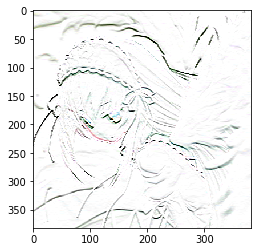

In [37]:
# 做卷积
conv_img = avatar

# strides = (1, 1)
ws = np.arange(0, len(conv_img)-2, 1)
hs = np.arange(0, len(conv_img)-2, 1)

output = []
output_gray = []

for h in hs:
    output.append([])
    output_gray.append([])
    for w in ws:
        # conv2d with sobel
        red = (conv_img[h][w][0]+conv_img[h][w+1][0]+conv_img[h][w+2][0])*(-1) + \
        (conv_img[h+2][w][0]+conv_img[h+2][w+1][0]+conv_img[h+2][w+2][0])*(1)
        green = (conv_img[h][w][1]+conv_img[h][w+1][1]+conv_img[h][w+2][1])*(-1) + \
        (conv_img[h+2][w][1]+conv_img[h+2][w+1][1]+conv_img[h+2][w+2][1])*(1)
        blue = (conv_img[h][w][2]+conv_img[h][w+1][2]+conv_img[h][w+2][2])*(-1) + \
        (conv_img[h+2][w][2]+conv_img[h+2][w+1][2]+conv_img[h+2][w+2][2])*(1)
        new_pix = [255-int(red),255-int(blue),255-int(green)]
         # save
        output[len(output)-1].append(new_pix)
        output_gray[len(output_gray)-1].append(int(red+green+blue))
        pass
    pass

show_image(np.array(output))

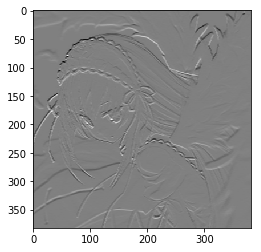

In [38]:
plt.imshow(output_gray, cmap='gray')
plt.show()